# Imports

In [60]:
from requests import get
from bs4 import BeautifulSoup
import os
from time import sleep
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import unicodedata
import json
from wordcloud import WordCloud
import numpy as np
import pprint as pprint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Data Acquisition

### Acquiring a list of movies.
100 Most Popular Movies on IMDb.

In [2]:
url = '''https://www.imdb.com/chart/moviemeter?ref_=nv_mv_mpm'''
response = get(url)

In [3]:
print(response.text[:400])




<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    
    
    

    
    
    

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">
            <style>
                body#styleguide


In [4]:
soup = BeautifulSoup(response.content, 
#                     'lxml')
                    'html.parser')

In [5]:
# see also `soup.find_all`

messy_movies = soup.find_all('td', class_='titleColumn')

In [6]:
len(messy_movies)

100

In [7]:
movies = []
trigger1 = []
for movie in messy_movies:
    movie_title = movie.find('a').text.lower().replace(' ', '%20')
    movies.append(re.sub(r"[^a-z0-9%\s]", '', movie_title))
    trigger1.append(False)
movies

['spiderman%20far%20from%20home',
 'midsommar',
 'toy%20story%204',
 'yesterday',
 'once%20upon%20a%20time%20%20in%20hollywood',
 'spiderman%20into%20the%20spiderverse',
 'avengers%20endgame',
 'knives%20out',
 'the%20lion%20king',
 'annabelle%20comes%20home',
 'shaft',
 'alita%20battle%20angel',
 'charlies%20angels',
 'shazam',
 'jumanji%20the%20next%20level',
 'murder%20mystery',
 'after',
 'aladdin',
 'hellboy',
 'rocketman',
 'spiderman%20homecoming',
 'childs%20play',
 'anna',
 'men%20in%20black%20international',
 'captain%20marvel',
 'midway',
 'john%20wick%20chapter%203%20%20parabellum',
 'us',
 'fast%20%20furious%20presents%20hobbs%20%20shaw',
 'crawl',
 'hereditary',
 'i%20am%20mother',
 'escape%20plan%20the%20extractors',
 'star%20wars%20the%20rise%20of%20skywalker',
 'robin%20hood',
 'pet%20sematary',
 'dark%20phoenix',
 'kabir%20singh',
 'the%20little%20mermaid',
 'dumbo',
 'the%20spy%20who%20dumped%20me',
 'godzilla%20king%20of%20the%20monsters',
 'it%20chapter%20two',
 's

### Acquiring a list of movies with triggers.

In [8]:
url = '''https://istheresuicideinit.tumblr.com/post/116009541869/films'''
response = get(url)

In [9]:
soup = BeautifulSoup(response.content, 
#                     'lxml')
                    'html.parser')

In [10]:
# see also `soup.find_all`

trigger_movies = soup.find('ul')
trigger_movies.find_all('li')

[<li>2:37 (2006)</li>,
 <li>3 idiots (2009)</li>,
 <li>28 days later (2002)</li>,
 <li>47 ronin (2013)</li>,
 <li>1408 (2007)</li>,
 <li>a clockwork orange (1971)</li>,
 <li>airplane! (1980)</li>,
 <li>almost famous (2000)</li>,
 <li>a long way down (2014)</li>,
 <li>always watching: a marble hornets story (2015)</li>,
 <li>a mother’s nightmare (2012)</li>,
 <li>an american werewolf in london (1981)</li>,
 <li>annabelle (2014)</li>,
 <li>anchorman 2: the legend continues (2013)</li>,
 <li>archie’s final project (2011)</li>,
 <li>arizona dream (1992) </li>,
 <li>as above, so below (2014)</li>,
 <li>a single man (2009)</li>,
 <li>a streetcar named desire (1951, 1984, 1987)</li>,
 <li>battle royale (2000)</li>,
 <li>before I disappear (2014)</li>,
 <li>ben x (2007)</li>,
 <li>better off dead (1985)</li>,
 <li>birdman: or (the unexpected virtue of ignorance) (2014)</li>,
 <li>blackbird (2014)</li>,
 <li>black swan (2010)</li>,
 <li>boogie nights (1997)</li>,
 <li>boogeyman 2 (2007)</li>,
 

In [11]:
trigger_movies_list = []
trigger2 = []
for trigger_movie in trigger_movies:
    movie_title = trigger_movie.text.replace(' ', '%20')
    movie_title = re.sub(r"[^\w%]", '', movie_title)
    trigger_movies_list.append(re.sub(r"[\d%]+$", '', movie_title))
    trigger2.append(True)
trigger_movies_list

['',
 '3%20idiots',
 '28%20days%20later',
 '47%20ronin',
 '',
 'a%20clockwork%20orange',
 'airplane',
 'almost%20famous',
 'a%20long%20way%20down',
 'always%20watching%20a%20marble%20hornets%20story',
 'a%20mothers%20nightmare',
 'an%20american%20werewolf%20in%20london',
 'annabelle',
 'anchorman%202%20the%20legend%20continues',
 'archies%20final%20project',
 'arizona%20dream',
 'as%20above%20so%20below',
 'a%20single%20man',
 'a%20streetcar%20named%20desire',
 'battle%20royale',
 'before%20I%20disappear',
 'ben%20x',
 'better%20off%20dead',
 'birdman%20or%20the%20unexpected%20virtue%20of%20ignorance',
 'blackbird',
 'black%20swan',
 'boogie%20nights',
 'boogeyman',
 'casino%20royale',
 'carrie',
 'charlie%20bartlett',
 'chatroom',
 'cloud%20atlas',
 'constantine',
 'cozy%20dens%20czech%20Pelíšky',
 'cyberbully',
 'cyberbully',
 'dead%20poets%20society',
 'dear%20lemon%20lima',
 'detachment',
 'die%20welle%20german',
 'disconnect',
 'divergent',
 'donnie%20darko',
 'edge%20of%20tomorro

In [12]:
len(trigger_movies_list)

159

In [13]:
trigger1.extend(trigger2)
len(trigger1)

259

In [14]:
movies.extend(trigger_movies_list)

### Scraping tweets from Twitter.

In [15]:
browser = webdriver.Chrome()
# print('Connecting to Twitter')


tweets = []
tweets_movie_title = []
tweets_trigger = []


for movie, trigger in list(zip(movies, trigger1)):
    # print(f'Looking up {movie}')
    browser.get(f"https://twitter.com/search?q={movie}%20trigger&src=typd")
    # time.sleep(1)

    elem = browser.find_element_by_tag_name("body")

    no_of_pagedowns = 18
    # print('Scrolling thru page.')

    while no_of_pagedowns:
        elem.send_keys(Keys.PAGE_DOWN)
        # time.sleep(0.2)
        no_of_pagedowns-=1

    post_elems = browser.find_elements_by_class_name("js-tweet-text-container")
    # print('Grabbing Tweets.')

    for post in post_elems:
        tweets.append(post.text)
        tweets_movie_title.append(movie)
        tweets_trigger.append(trigger)
    # print('Completed.')

In [16]:
df = pd.DataFrame({'title':tweets_movie_title, 'tweet':tweets, 'trigger_scene':tweets_trigger})
df.head()

,title,tweet,trigger_scene
0,spiderman%20far%20from%20home,#SpiderMan writers were scared to pull the tri...,False
1,spiderman%20far%20from%20home,Trigger warning for all photographers before s...,False
2,spiderman%20far%20from%20home,why does this trigger me so much :((\n\n#FarFr...,False
3,spiderman%20far%20from%20home,so i just finished watching spiderman far from...,False
4,spiderman%20far%20from%20home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False


## Data Preparation

##### Fixing title column.

In [17]:
df.title = df.title.str.replace('%20', '_')
df.head()

,title,tweet,trigger_scene
0,spiderman_far_from_home,#SpiderMan writers were scared to pull the tri...,False
1,spiderman_far_from_home,Trigger warning for all photographers before s...,False
2,spiderman_far_from_home,why does this trigger me so much :((\n\n#FarFr...,False
3,spiderman_far_from_home,so i just finished watching spiderman far from...,False
4,spiderman_far_from_home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False


##### Lowercasing the text.

In [18]:
df['cleaned_text'] = df.tweet.str.lower()
df.head()

,title,tweet,trigger_scene,cleaned_text
0,spiderman_far_from_home,#SpiderMan writers were scared to pull the tri...,False,#spiderman writers were scared to pull the tri...
1,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...
2,spiderman_far_from_home,why does this trigger me so much :((\n\n#FarFr...,False,why does this trigger me so much :((\n\n#farfr...
3,spiderman_far_from_home,so i just finished watching spiderman far from...,False,so i just finished watching spiderman far from...
4,spiderman_far_from_home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False,⠀⠀ ❝you don't want any part in this...❞\n⠀⠀ ⠀❧...


##### Converting and standardizing accented characters into ASCII characters.

In [19]:
def replace_accented_characters(text):
    no_accent_text = unicodedata.normalize('NFKD', text)\
                        .encode('ascii', 'ignore')\
                        .decode('utf-8', 'ignore')
    return no_accent_text

df.cleaned_text = df.cleaned_text.apply(replace_accented_characters)
df.head()

,title,tweet,trigger_scene,cleaned_text
0,spiderman_far_from_home,#SpiderMan writers were scared to pull the tri...,False,#spiderman writers were scared to pull the tri...
1,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...
2,spiderman_far_from_home,why does this trigger me so much :((\n\n#FarFr...,False,why does this trigger me so much :((\n\n#farfr...
3,spiderman_far_from_home,so i just finished watching spiderman far from...,False,so i just finished watching spiderman far from...
4,spiderman_far_from_home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False,you don't want any part in this...\n q b. as...


##### Removing special characters.

In [20]:
# remove anything that is not a through z, a number, a single quote, or whitespace
def remove_special_characters(text):
    no_special_text = re.sub(r"[^a-z0-9\s]", '', text)
    return no_special_text

df.cleaned_text = df.cleaned_text.apply(remove_special_characters)
df.head()

,title,tweet,trigger_scene,cleaned_text
0,spiderman_far_from_home,#SpiderMan writers were scared to pull the tri...,False,spiderman writers were scared to pull the trig...
1,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...
2,spiderman_far_from_home,why does this trigger me so much :((\n\n#FarFr...,False,why does this trigger me so much \n\nfarfromho...
3,spiderman_far_from_home,so i just finished watching spiderman far from...,False,so i just finished watching spiderman far from...
4,spiderman_far_from_home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False,you dont want any part in this\n q b as ms \...


##### Tokenization

In [21]:
def tokenize_text(text):
    tokenizer = nltk.tokenize.ToktokTokenizer()
    return tokenizer.tokenize(text, return_str=True)

df.cleaned_text = df.cleaned_text.apply(tokenize_text)
df.head()

,title,tweet,trigger_scene,cleaned_text
0,spiderman_far_from_home,#SpiderMan writers were scared to pull the tri...,False,spiderman writers were scared to pull the trig...
1,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...
2,spiderman_far_from_home,why does this trigger me so much :((\n\n#FarFr...,False,why does this trigger me so much \n\nfarfromho...
3,spiderman_far_from_home,so i just finished watching spiderman far from...,False,so i just finished watching spiderman far from...
4,spiderman_far_from_home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False,you dont want any part in this\n q b as ms \n ...


##### Stemming

In [22]:
# Create the nltk stemmer object, then use it
def stemmer(text):
    ps = nltk.porter.PorterStemmer()
    stemmed_list = [ps.stem(word) for word in text.split()]
    stemmed_text = ' '.join(stemmed_list)
    return stemmed_text

df['stemmed_text'] = df.cleaned_text.apply(stemmer)
df.head()

,title,tweet,trigger_scene,cleaned_text,stemmed_text
0,spiderman_far_from_home,#SpiderMan writers were scared to pull the tri...,False,spiderman writers were scared to pull the trig...,spiderman writer were scare to pull the trigge...
1,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...,trigger warn for all photograph befor see spid...
2,spiderman_far_from_home,why does this trigger me so much :((\n\n#FarFr...,False,why does this trigger me so much \n\nfarfromho...,whi doe thi trigger me so much farfromhom spid...
3,spiderman_far_from_home,so i just finished watching spiderman far from...,False,so i just finished watching spiderman far from...,so i just finish watch spiderman far from home...
4,spiderman_far_from_home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False,you dont want any part in this\n q b as ms \n ...,you dont want ani part in thi q b as ms spider...


In [23]:
pd.Series(' '.join(df.stemmed_text).split()).value_counts().head(10)

the        3755
trigger    3404
a          2158
to         2031
and        1663
i          1551
of         1445
it         1303
in         1131
is         1027
dtype: int64

##### Lemmatizing

In [24]:
def lemmatizer(text):
    wnl = nltk.stem.WordNetLemmatizer()
    lemmatized_list = [wnl.lemmatize(word) for word in text.split()]
    lemmatized_text = ' '.join(lemmatized_list)
    return lemmatized_text

df['lemmatized_text'] = df.cleaned_text.apply(lemmatizer)
df.head()

,title,tweet,trigger_scene,cleaned_text,stemmed_text,lemmatized_text
0,spiderman_far_from_home,#SpiderMan writers were scared to pull the tri...,False,spiderman writers were scared to pull the trig...,spiderman writer were scare to pull the trigge...,spiderman writer were scared to pull the trigg...
1,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...,trigger warn for all photograph befor see spid...,trigger warning for all photographer before se...
2,spiderman_far_from_home,why does this trigger me so much :((\n\n#FarFr...,False,why does this trigger me so much \n\nfarfromho...,whi doe thi trigger me so much farfromhom spid...,why doe this trigger me so much farfromhome sp...
3,spiderman_far_from_home,so i just finished watching spiderman far from...,False,so i just finished watching spiderman far from...,so i just finish watch spiderman far from home...,so i just finished watching spiderman far from...
4,spiderman_far_from_home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False,you dont want any part in this\n q b as ms \n ...,you dont want ani part in thi q b as ms spider...,you dont want any part in this q b a m spiderm...


In [25]:
pd.Series(' '.join(df.lemmatized_text).split()).value_counts().head(10)

the        3755
trigger    3362
a          2458
to         2031
and        1663
i          1551
of         1445
it         1303
in         1131
is         1027
dtype: int64

##### Removing stopwords

In [26]:
stopwords_to_add = ' '.join(movies).replace('%20', ' ').split()
stopwords_to_add[:20]
stopwords_to_add.extend(['trigger'])

In [27]:
stopword_list = stopwords.words('english')

stopword_list.remove('no')
stopword_list.remove('not')

stopword_list.extend(stopwords_to_add)

# stopword_list.remove('warning')
stopword_list.remove('suicide')
stopword_list.remove('suicides')

print('warning' in stopword_list)

stopword_list[:10]

False


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [28]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [w for w in words if w not in stopword_list]
    text_without_stopwords = ' '.join(filtered_words)
    return text_without_stopwords

df['lemmatized_no_stopwords'] = df.lemmatized_text.apply(remove_stopwords)
df.head()

,title,tweet,trigger_scene,cleaned_text,stemmed_text,lemmatized_text,lemmatized_no_stopwords
0,spiderman_far_from_home,#SpiderMan writers were scared to pull the tri...,False,spiderman writers were scared to pull the trig...,spiderman writer were scare to pull the trigge...,spiderman writer were scared to pull the trigg...,writer scared pull big reveal forever change p...
1,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...,trigger warn for all photograph befor see spid...,trigger warning for all photographer before se...,warning photographer seeing
2,spiderman_far_from_home,why does this trigger me so much :((\n\n#FarFr...,False,why does this trigger me so much \n\nfarfromho...,whi doe thi trigger me so much farfromhom spid...,why doe this trigger me so much farfromhome sp...,doe much farfromhome
3,spiderman_far_from_home,so i just finished watching spiderman far from...,False,so i just finished watching spiderman far from...,so i just finish watch spiderman far from home...,so i just finished watching spiderman far from...,finished loved im car hearing fever got confus...
4,spiderman_far_from_home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False,you dont want any part in this\n q b as ms \n ...,you dont want ani part in thi q b as ms spider...,you dont want any part in this q b a m spiderm...,want part q b warning selective ship mv theme ...


In [29]:
pd.Series(' '.join(df.lemmatized_no_stopwords).split()).value_counts().head()

warning    429
wa         409
like       370
im         310
movie      304
dtype: int64

In [30]:
df['stemmed_no_stopwords'] = df.stemmed_text.apply(remove_stopwords)
df.head()

,title,tweet,trigger_scene,cleaned_text,stemmed_text,lemmatized_text,lemmatized_no_stopwords,stemmed_no_stopwords
0,spiderman_far_from_home,#SpiderMan writers were scared to pull the tri...,False,spiderman writers were scared to pull the trig...,spiderman writer were scare to pull the trigge...,spiderman writer were scared to pull the trigg...,writer scared pull big reveal forever change p...,writer scare pull big reveal forev chang peter...
1,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...,trigger warn for all photograph befor see spid...,trigger warning for all photographer before se...,warning photographer seeing,warn photograph befor see
2,spiderman_far_from_home,why does this trigger me so much :((\n\n#FarFr...,False,why does this trigger me so much \n\nfarfromho...,whi doe thi trigger me so much farfromhom spid...,why doe this trigger me so much farfromhome sp...,doe much farfromhome,whi doe thi much farfromhom
3,spiderman_far_from_home,so i just finished watching spiderman far from...,False,so i just finished watching spiderman far from...,so i just finish watch spiderman far from home...,so i just finished watching spiderman far from...,finished loved im car hearing fever got confus...,finish watch im car hear fever got confus bc t...
4,spiderman_far_from_home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False,you dont want any part in this\n q b as ms \n ...,you dont want ani part in thi q b as ms spider...,you dont want any part in this q b a m spiderm...,want part q b warning selective ship mv theme ...,want ani part thi q b ms warn select ship ms m...


In [31]:
pd.Series(' '.join(df.stemmed_no_stopwords).split()).value_counts().head()

thi     538
warn    452
pull    410
wa      409
like    396
dtype: int64

### Data Exploration

##### How are the classes split up?

In [32]:
labels = pd.concat([df.trigger_scene.value_counts(), df.trigger_scene.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'proportion']
labels

,n,proportion
True,2106,0.607091
False,1363,0.392909


##### Exploring frequency of words based on classification.

In [33]:
trigger_scene_words = ' '.join(df[df.trigger_scene == True].lemmatized_no_stopwords)
no_trigger_scene_words = ' '.join(df[df.trigger_scene == False].lemmatized_no_stopwords)
all_words = ' '.join(df.lemmatized_no_stopwords)

In [34]:
trigger_scene_freq = pd.Series(trigger_scene_words.split()).value_counts()
no_trigger_scene_freq = pd.Series(no_trigger_scene_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [35]:
trigger_scene_freq.head()

warning    251
wa         198
like       196
im         180
pull       173
dtype: int64

##### Combining frequency Series into one DataFrame.

In [36]:
word_counts = (pd.concat([all_freq, trigger_scene_freq, no_trigger_scene_freq], axis=1, sort=True)
 .set_axis(['all', 'trigger', 'no_trigger'], axis=1, inplace=False)
 .fillna(0)
 .astype('int'))

word_counts.head()

,all,trigger,no_trigger
0,4,4,0
002,1,1,0
007,4,4,0
015,1,0,1
02,3,1,2


##### Exploring the frequencies dataframe.

In [37]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,trigger,no_trigger
warning,429,251,178
wa,409,198,211
like,370,196,174
im,310,180,130
movie,304,167,137
pull,258,173,85
get,175,103,72
no,170,109,61
know,169,95,74
ha,163,104,59


'Trigger' is most popular word since it is included in the search that is done when scraping the tweets. 'Warning' is second most popular, with the pupularity rank being slightly different for trigger vs. no trigger. 'Movie' can probably be removed.

##### Checking to see if there are any words that are unique to movies with trigger scenes or not.

In [38]:
word_counts[word_counts.no_trigger == 0].sort_values(by='trigger', ascending=False).head(10)

,all,trigger,no_trigger
horn,21,21,0
goony,21,21,0
poet,15,15,0
darling,11,11,0
pound,11,11,0
thomas,10,10,0
data,9,9,0
report,9,9,0
machine,8,8,0
object,8,8,0


In [39]:
word_counts[word_counts.trigger == 0].sort_values(by='no_trigger', ascending=False).head(10)

,all,trigger,no_trigger
asian,23,0,23
l1r1,13,0,13
gamepad,10,0,10
joystick,10,0,10
kabirsingh,9,0,9
outrules,9,0,9
mufasa,8,0,8
pixar,8,0,8
casting,7,0,7
wheres,7,0,7


##### Visualizing the proportion of classes in the 20 most popular words.

Text(0.5, 1.0, 'Proportion of Trigger vs No Trigger for the 20 most common words')

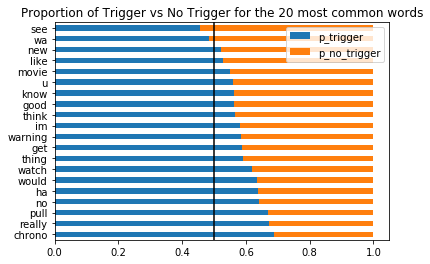

In [40]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_trigger=word_counts.trigger / word_counts['all'],
         p_no_trigger=word_counts.no_trigger / word_counts['all'])
 .sort_values(by='all')
 [['p_trigger', 'p_no_trigger']]
 .tail(20)
 .sort_values('p_no_trigger')
 .plot.barh(stacked=True))

plt.vlines(x=0.5, ymin=-1, ymax=20)
plt.title('Proportion of Trigger vs No Trigger for the 20 most common words')

##### Ratio of frequencies for trigger to no trigger.

In [41]:
(word_counts[(word_counts.trigger > 10) & (word_counts.no_trigger > 10)]
 .assign(ratio= lambda df: df.trigger / df.no_trigger)).sort_values(by='ratio').head(10)

,all,trigger,no_trigger,ratio
trailer,39,12,27,0.444444
avenger,56,19,37,0.513514
review,32,11,21,0.523810
fire,30,11,19,0.578947
seeing,40,15,25,0.600000
whole,38,15,23,0.652174
amazing,31,13,18,0.722222
anime,26,11,15,0.733333
film,122,52,70,0.742857
literally,28,12,16,0.750000


##### Word Cloud visualizations.

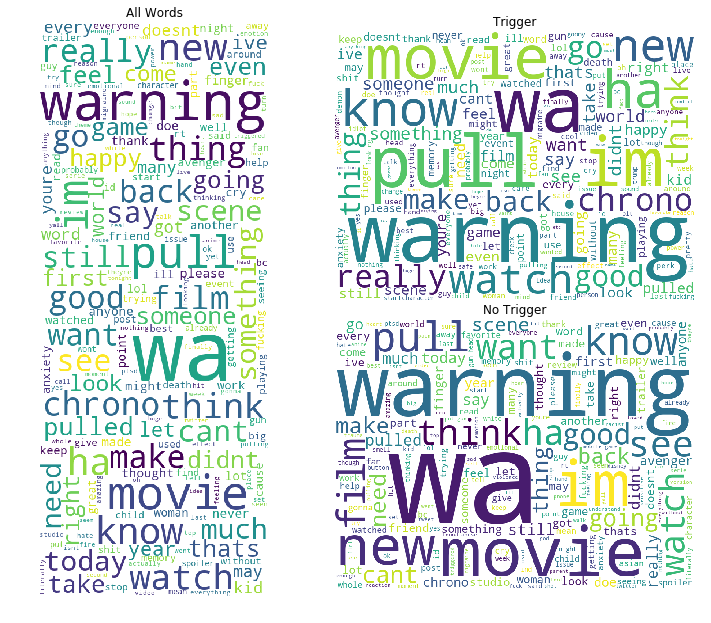

In [42]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(all_words)
trigger_cloud = WordCloud(background_color='white', height=600, width=800).generate(trigger_scene_words)
no_trigger_cloud = WordCloud(background_color='white', height=600, width=800).generate(no_trigger_scene_words)

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(trigger_cloud)
axs[2].imshow(no_trigger_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Trigger')
axs[2].set_title('No Trigger')

for ax in axs: ax.axis('off')

#### Exploring bigrams.

Bigrams for Movies with Trigger Scenes.

In [43]:
trigger_bigrams = nltk.ngrams(trigger_scene_words.split(), 2)
trigger_bigrams

<generator object ngrams at 0x000001EB65AEA2A0>

In [44]:
top_20_trigger_scene_bigrams = pd.Series(list(trigger_bigrams)).value_counts().head(20)
top_20_trigger_scene_bigrams.head()

(woman, child)     16
(feel, like)       15
(need, warning)    13
(im, gonna)        13
(self, harm)       12
dtype: int64

Visualizing Frequencies with a bar plot and a word cloud.

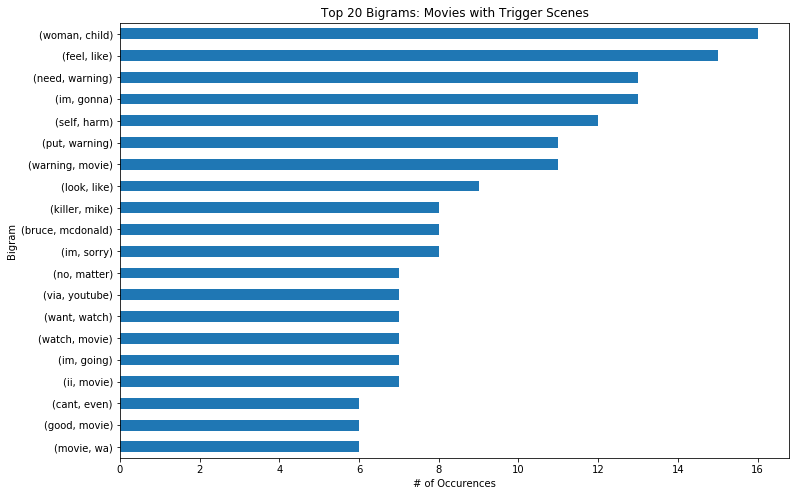

In [45]:
plt.figure(figsize=(12, 8))
top_20_trigger_scene_bigrams.sort_values().plot.barh(stacked=True)

plt.title('Top 20 Bigrams: Movies with Trigger Scenes')
plt.xlabel('# of Occurences')
plt.ylabel('Bigram')
plt.show()

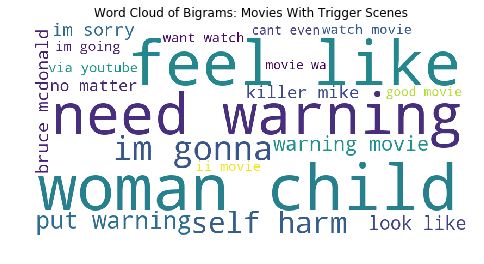

In [46]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.


data = {k[0] + ' ' + k[1]: v for k, v in top_20_trigger_scene_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.title('Word Cloud of Bigrams: Movies With Trigger Scenes')
plt.imshow(img)
plt.axis('off')
plt.show()

Bigrams for Movies Without Trigger Scenes

In [47]:
no_trigger_bigrams = nltk.ngrams(no_trigger_scene_words.split(), 2)
no_trigger_bigrams

<generator object ngrams at 0x000001EB65AEAED0>

In [48]:
top_20_no_trigger_scene_bigrams = pd.Series(list(no_trigger_bigrams)).value_counts().head(20)
top_20_no_trigger_scene_bigrams.head()

(gun, head)       17
(mobile, game)    16
(put, gun)        15
(smell, like)     15
(im, gonna)       11
dtype: int64

Visualizing Frequencies with a bar plot and a word cloud.

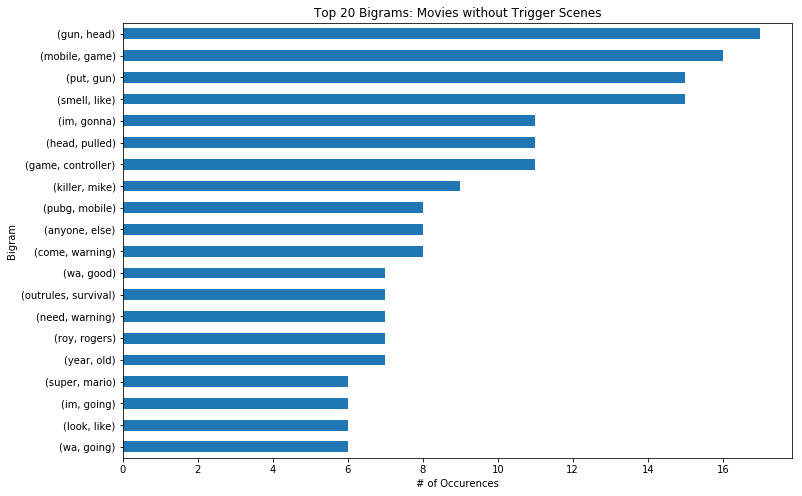

In [49]:
plt.figure(figsize=(12, 8))
top_20_no_trigger_scene_bigrams.sort_values().plot.barh(stacked=True)

plt.title('Top 20 Bigrams: Movies without Trigger Scenes')
plt.xlabel('# of Occurences')
plt.ylabel('Bigram')
plt.show()

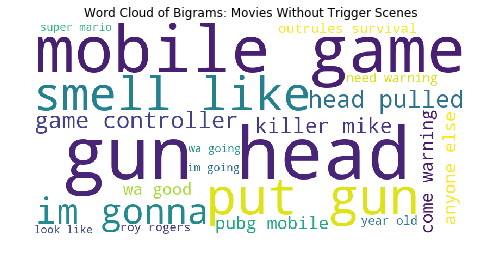

In [50]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_no_trigger_scene_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.title('Word Cloud of Bigrams: Movies Without Trigger Scenes')
plt.axis('off')
plt.show()

### Modeling
First, we need to do some feature engineering.

##### Looking at raw counts, frequencies, and augmented frequencies. Term Frequency.

In [51]:
(pd.DataFrame({'raw_count':trigger_scene_freq})
 .assign(frequency= lambda df: df.raw_count / df.raw_count.sum())
 .assign(augmented_frequency= lambda df: df.frequency / df.frequency.max()).head(10))

,raw_count,frequency,augmented_frequency
warning,251,0.009945,1.000000
wa,198,0.007845,0.788845
like,196,0.007765,0.780876
im,180,0.007132,0.717131
pull,173,0.006854,0.689243
movie,167,0.006616,0.665339
no,109,0.004319,0.434263
ha,104,0.004120,0.414343
get,103,0.004081,0.410359
would,96,0.003803,0.382470


In [52]:
(pd.DataFrame({'raw_count':no_trigger_scene_freq})
 .assign(frequency= lambda df: df.raw_count / df.raw_count.sum())
 .assign(augmented_frequency= lambda df: df.frequency / df.frequency.max()).head(10)).head(10)

,raw_count,frequency,augmented_frequency
wa,211,0.011776,1.000000
warning,178,0.009934,0.843602
like,174,0.009711,0.824645
movie,137,0.007646,0.649289
im,130,0.007255,0.616114
pull,85,0.004744,0.402844
know,74,0.004130,0.350711
get,72,0.004018,0.341232
new,71,0.003962,0.336493
film,70,0.003907,0.331754


##### Inverse Document Frequency

In [53]:
# A simple way to calculate idf for demonstration. Note that this
# function relies on the globally defined documents variable.
def idf(word):
    n_occurences = sum([1 for tweet in df.lemmatized_no_stopwords if word in tweet])
    return df.shape[0] / n_occurences

# Get a list of the unique words
unique_words = pd.Series(' '.join(df.lemmatized_no_stopwords).split()).unique()

# put the unique words into a data frame
(pd.DataFrame(dict(word=unique_words))
 # calculate the idf for each word
 .assign(idf=lambda df: df.word.apply(idf))
 # sort the data for presentation purposes
 .set_index('word')
 .sort_values(by='idf', ascending=False)
 .head(5))

,idf
word,
weightgain,3469.0
isolation,3469.0
assuming,3469.0
womxn,3469.0
femmes,3469.0


##### Using scikit learn to calculate TF-IDF.
Lemmatized without stopwords.

In [54]:
tfidf = TfidfVectorizer()
tfidfs = tfidf.fit_transform(df.lemmatized_no_stopwords)
tfidfs

<3469x12198 sparse matrix of type '<class 'numpy.float64'>'
	with 40948 stored elements in Compressed Sparse Row format>

In [55]:
pd.DataFrame(tfidfs.todense(), columns=tfidf.get_feature_names()).head(10)

,002,007,015,02,03,0539,06,08,0806,08230,...,zo,zod,zombie,zone,zoning,zonnebril,zootopia,zorx,zu,zune
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Now we can start modeling
We will be using classification models such as Logistic Regression and Decision Tree.

In [56]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df.lemmatized_no_stopwords)
y = df.trigger_scene

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3, random_state=123)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

### Logistic Regression

In [57]:
lr = LogisticRegression().fit(X_train, y_train)

train['predicted'] = lr.predict(X_train)
test['predicted'] = lr.predict(X_test)

C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


##### Train

In [58]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

Accuracy: 82.29%
---
Confusion Matrix
actual     False  True 
predicted              
False        536     12
True         418   1462
---
              precision    recall  f1-score   support

       False       0.98      0.56      0.71       954
        True       0.78      0.99      0.87      1474

   micro avg       0.82      0.82      0.82      2428
   macro avg       0.88      0.78      0.79      2428
weighted avg       0.86      0.82      0.81      2428



##### Test

In [59]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.predicted, test.actual))
print('---')
print(classification_report(test.actual, test.predicted))

Accuracy: 65.13%
---
Confusion Matrix
actual     False  True 
predicted              
False         76     30
True         333    602
---
              precision    recall  f1-score   support

       False       0.72      0.19      0.30       409
        True       0.64      0.95      0.77       632

   micro avg       0.65      0.65      0.65      1041
   macro avg       0.68      0.57      0.53      1041
weighted avg       0.67      0.65      0.58      1041



### Decision Tree

In [61]:
dt = DecisionTreeClassifier(max_depth=5, random_state=123).fit(X_train, y_train)

train['predicted_decision_tree'] = dt.predict(X_train)
test['predicted_decision_tree'] = dt.predict(X_test)

In [63]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_decision_tree)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted_decision_tree, train.actual))
print('---')
print(classification_report(train.actual, train.predicted_decision_tree))

Accuracy: 63.96%
---
Confusion Matrix
actual                   False  True 
predicted_decision_tree              
False                       91     12
True                       863   1462
---
              precision    recall  f1-score   support

       False       0.88      0.10      0.17       954
        True       0.63      0.99      0.77      1474

   micro avg       0.64      0.64      0.64      2428
   macro avg       0.76      0.54      0.47      2428
weighted avg       0.73      0.64      0.53      2428



In [64]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted_decision_tree)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.predicted_decision_tree, test.actual))
print('---')
print(classification_report(test.actual, test.predicted_decision_tree))

Accuracy: 62.15%
---
Confusion Matrix
actual                   False  True 
predicted_decision_tree              
False                       21      6
True                       388    626
---
              precision    recall  f1-score   support

       False       0.78      0.05      0.10       409
        True       0.62      0.99      0.76       632

   micro avg       0.62      0.62      0.62      1041
   macro avg       0.70      0.52      0.43      1041
weighted avg       0.68      0.62      0.50      1041

